# 1.7 Network graph visualization

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import relationship data

relationship_df = pd.read_csv('NER_countries_relationship.csv', index_col = 0)

In [3]:
relationship_df

,source,target,value
0,Austria,France,6
1,Austria,Hungary,6
2,Hungary,Russia,5
3,Germany,Russia,33
4,Germany,Ukraine,10
...,...,...,...
109,Canada,Russia,3
110,Lithuania,United States,5
111,Lithuania,Russia,5
112,Rwanda,South Africa,5


#### Graph visualization - Networkx

In [5]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

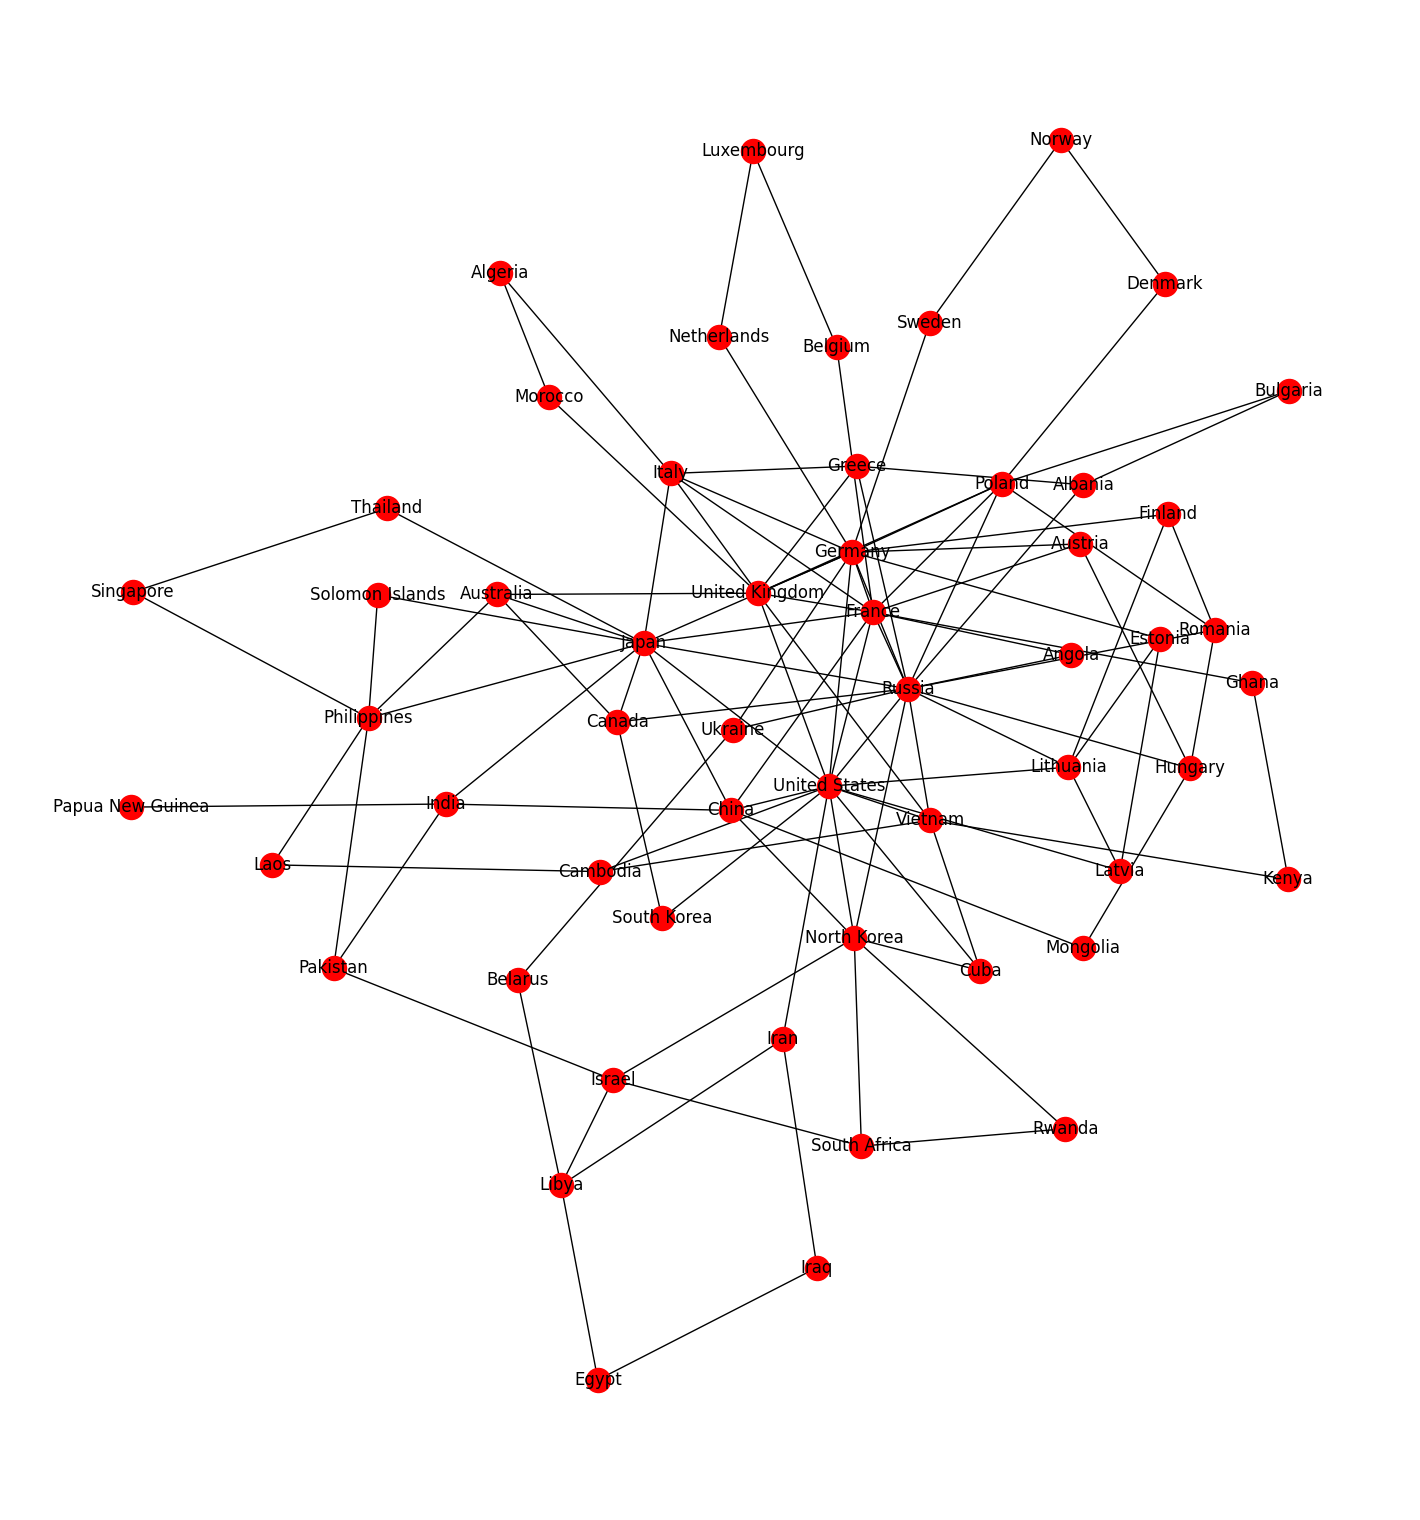

In [8]:
h = plt.figure(figsize = (14,15))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [9]:
h.savefig('networkx_plt_country_relationship.png')

#### Graph visualization - Pyvis

In [10]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_Century.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Community detection - Leiden algorithm

In [11]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'wurlitzer', 'graph_tool', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [12]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [13]:
new_com = coms.to_node_community_map()

In [14]:
new_com

defaultdict(list,
            {'Austria': [0],
             'France': [0],
             'Germany': [0],
             'Italy': [0],
             'United Kingdom': [0],
             'Poland': [0],
             'Denmark': [0],
             'Norway': [0],
             'Sweden': [0],
             'Netherlands': [0],
             'Luxembourg': [0],
             'Belgium': [0],
             'Morocco': [0],
             'Algeria': [0],
             'Estonia': [1],
             'Latvia': [1],
             'Lithuania': [1],
             'United States': [1],
             'Laos': [1],
             'Cambodia': [1],
             'Vietnam': [1],
             'Kenya': [1],
             'Ghana': [1],
             'Cuba': [1],
             'South Korea': [1],
             'Japan': [2],
             'China': [2],
             'Thailand': [2],
             'Singapore': [2],
             'Philippines': [2],
             'Solomon Islands': [2],
             'Australia': [2],
             'India': [2],
    

In [15]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [16]:
dict_com

{'Austria': 0,
 'France': 0,
 'Germany': 0,
 'Italy': 0,
 'United Kingdom': 0,
 'Poland': 0,
 'Denmark': 0,
 'Norway': 0,
 'Sweden': 0,
 'Netherlands': 0,
 'Luxembourg': 0,
 'Belgium': 0,
 'Morocco': 0,
 'Algeria': 0,
 'Estonia': 1,
 'Latvia': 1,
 'Lithuania': 1,
 'United States': 1,
 'Laos': 1,
 'Cambodia': 1,
 'Vietnam': 1,
 'Kenya': 1,
 'Ghana': 1,
 'Cuba': 1,
 'South Korea': 1,
 'Japan': 2,
 'China': 2,
 'Thailand': 2,
 'Singapore': 2,
 'Philippines': 2,
 'Solomon Islands': 2,
 'Australia': 2,
 'India': 2,
 'Pakistan': 2,
 'Papua New Guinea': 2,
 'Canada': 2,
 'Hungary': 3,
 'Russia': 3,
 'Finland': 3,
 'Greece': 3,
 'Albania': 3,
 'Angola': 3,
 'Romania': 3,
 'Bulgaria': 3,
 'Mongolia': 3,
 'Ukraine': 4,
 'Belarus': 4,
 'Libya': 4,
 'Egypt': 4,
 'Iraq': 4,
 'Iran': 4,
 'Israel': 5,
 'North Korea': 5,
 'South Africa': 5,
 'Rwanda': 5}

In [17]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("alice_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [40]:
# The network visualization (20th_Century.html) shows six clear communities detected by the algorithm. Overall, the partition aligns well with historical blocs of the 20th century.

# C0 — Western Europe & colonies: France, Germany, UK, Italy, Nordics, Benelux, Morocco, Algeria → strong WWII & colonial ties.
# C1 — US & Cold War periphery: US, Baltics, Vietnam, Laos, Cuba, Kenya, Ghana → reflects US involvement in Asia, Africa, and Latin America.
# C2 — Pacific & Asia: Japan, China, India, Pakistan, Australia → WWII Pacific front and later economic links.
# C3 — Soviet/Eastern Bloc: Russia, Hungary, Romania, Bulgaria, Mongolia → Cold War allies and communist sphere.
# C4 — USSR borderlands & MENA: Ukraine, Belarus, Libya, Egypt, Iraq, Iran → ties between Soviet Union and Middle East.
# C5 — Outliers/bridges: Israel, North Korea, South Africa, Rwanda → cross-bloc mentions in political/conflict contexts.

# The largest hubs are Russia, United States, Germany, Japan, France, and United Kingdom, confirming their central roles in 20th-century narratives.

# Top triads/bridges:
# Japan–US (35) and Japan–China (27) underline Japan’s central role across wartime and postwar contexts.
# Russia–Germany (33) and Russia–US (27) indicate frequent co-mentions across war, détente, and rivalry phases.
# Germany–Italy (26) and Germany–Poland (21) emphasize continental dynamics.


### The most important countries in 20th Century

In [18]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Austria': 0.05555555555555555,
 'France': 0.2222222222222222,
 'Hungary': 0.07407407407407407,
 'Russia': 0.2777777777777778,
 'Germany': 0.24074074074074073,
 'Ukraine': 0.05555555555555555,
 'Italy': 0.1111111111111111,
 'United Kingdom': 0.16666666666666666,
 'Poland': 0.12962962962962962,
 'Estonia': 0.05555555555555555,
 'Latvia': 0.05555555555555555,
 'Lithuania': 0.09259259259259259,
 'Finland': 0.05555555555555555,
 'Denmark': 0.037037037037037035,
 'Norway': 0.037037037037037035,
 'Sweden': 0.037037037037037035,
 'Netherlands': 0.037037037037037035,
 'Luxembourg': 0.037037037037037035,
 'Belgium': 0.037037037037037035,
 'Greece': 0.07407407407407407,
 'Albania': 0.05555555555555555,
 'Belarus': 0.037037037037037035,
 'Libya': 0.07407407407407407,
 'Egypt': 0.037037037037037035,
 'Iraq': 0.037037037037037035,
 'Iran': 0.05555555555555555,
 'Japan': 0.2222222222222222,
 'United States': 0.25925925925925924,
 'Morocco': 0.037037037037037035,
 'Algeria': 0.037037037037037035,
 '

In [19]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['characters','centrality'])

In [20]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

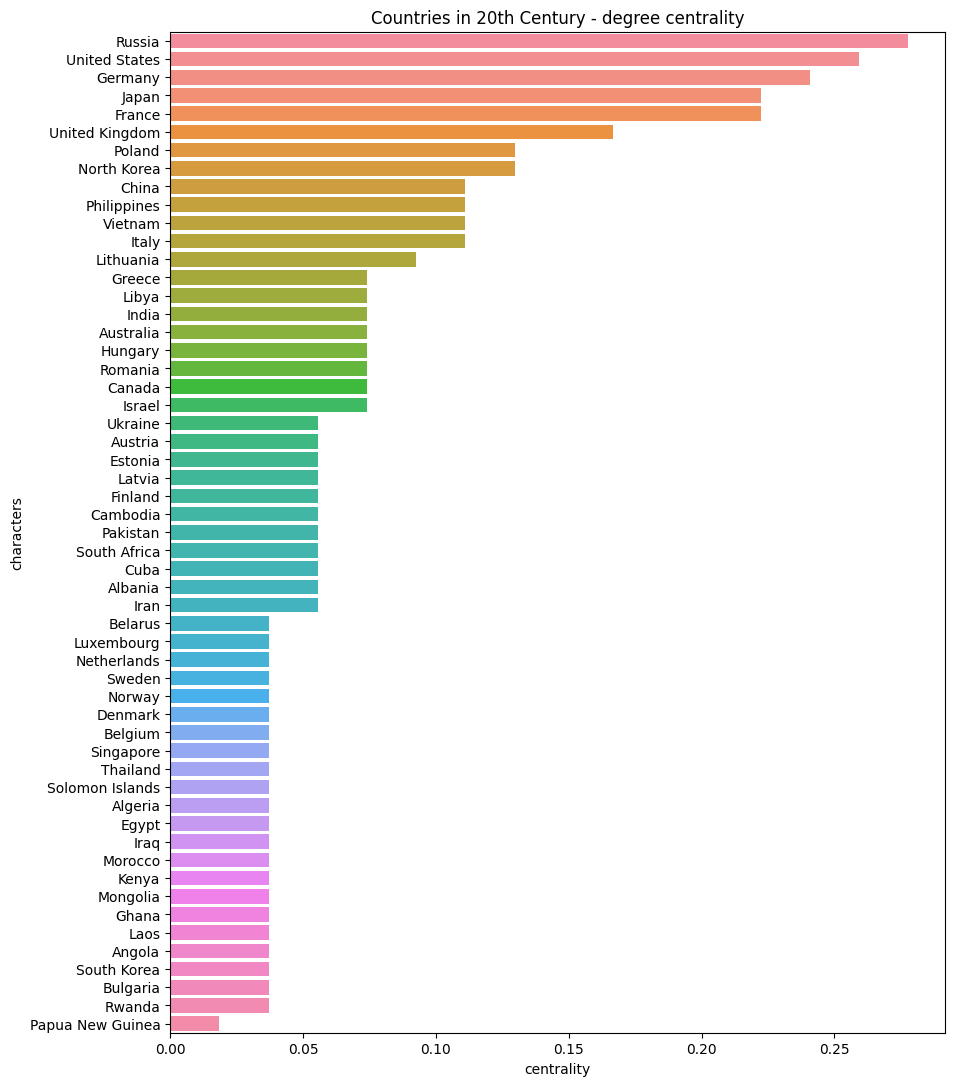

In [25]:
# Plot the degree centrality

plt.figure(figsize = (10, 13))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = degree_df).set_title("Countries in 20th Century - degree centrality")

In [41]:
# Degree Centrality

# The highest degree centrality scores belong to Russia, United States, Germany and Japan,.
# This means these countries have the largest number of direct connections to others in the historical network — they appear most often in events that involved many nations (e.g., World Wars, Cold War).
# European and global powers like France, United Kingdom, and Italy also score high, which aligns with their extensive political and military interactions.

In [26]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['characters','centrality'])

In [27]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

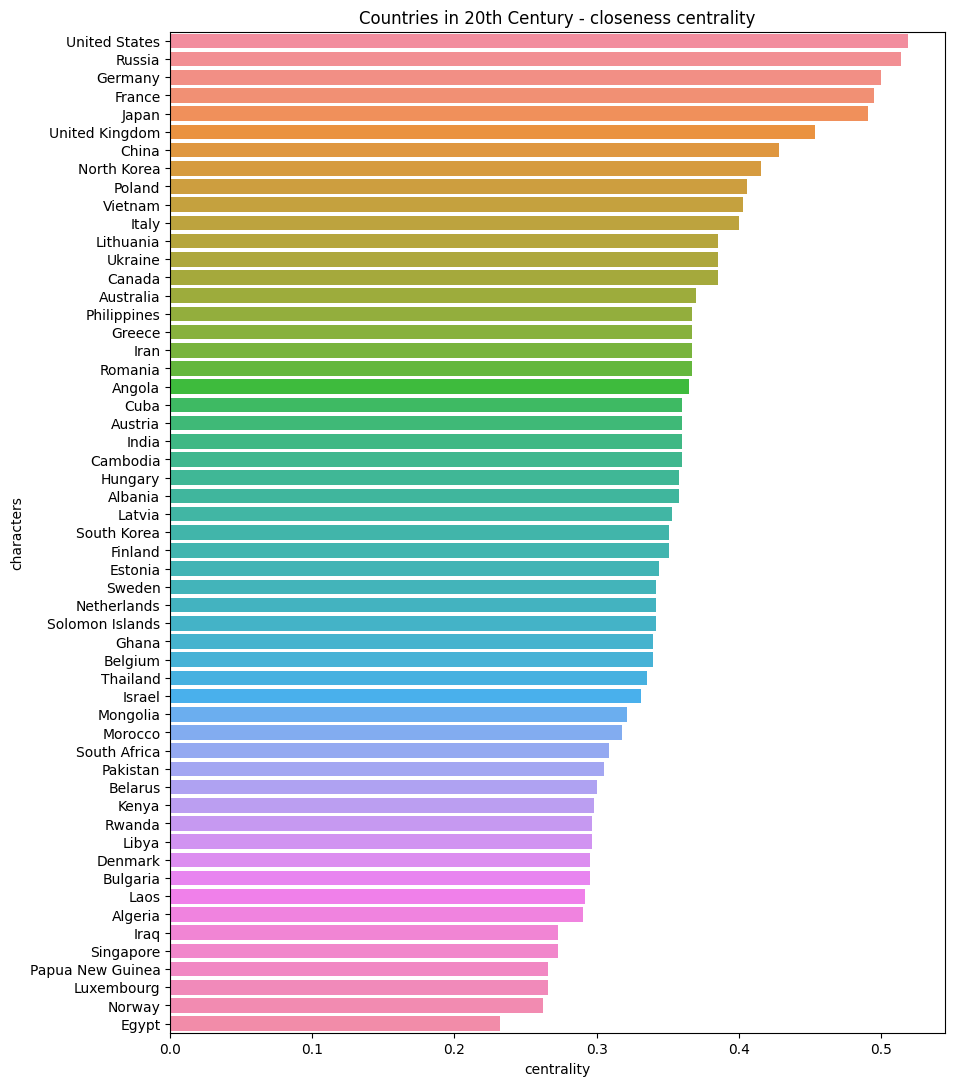

In [42]:
plt.figure(figsize = (10, 13))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = closeness_df).set_title("Countries in 20th Century - closeness centrality")

In [43]:
# Closeness Centrality

# Countries such as Germany, Russia, and United States have high closeness values, suggesting they are well positioned to reach any other country quickly within the network.
# This highlights their central strategic position in the 20th century, connecting multiple regions — Europe, Asia, and the Americas.

In [30]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['characters','centrality'])

In [31]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

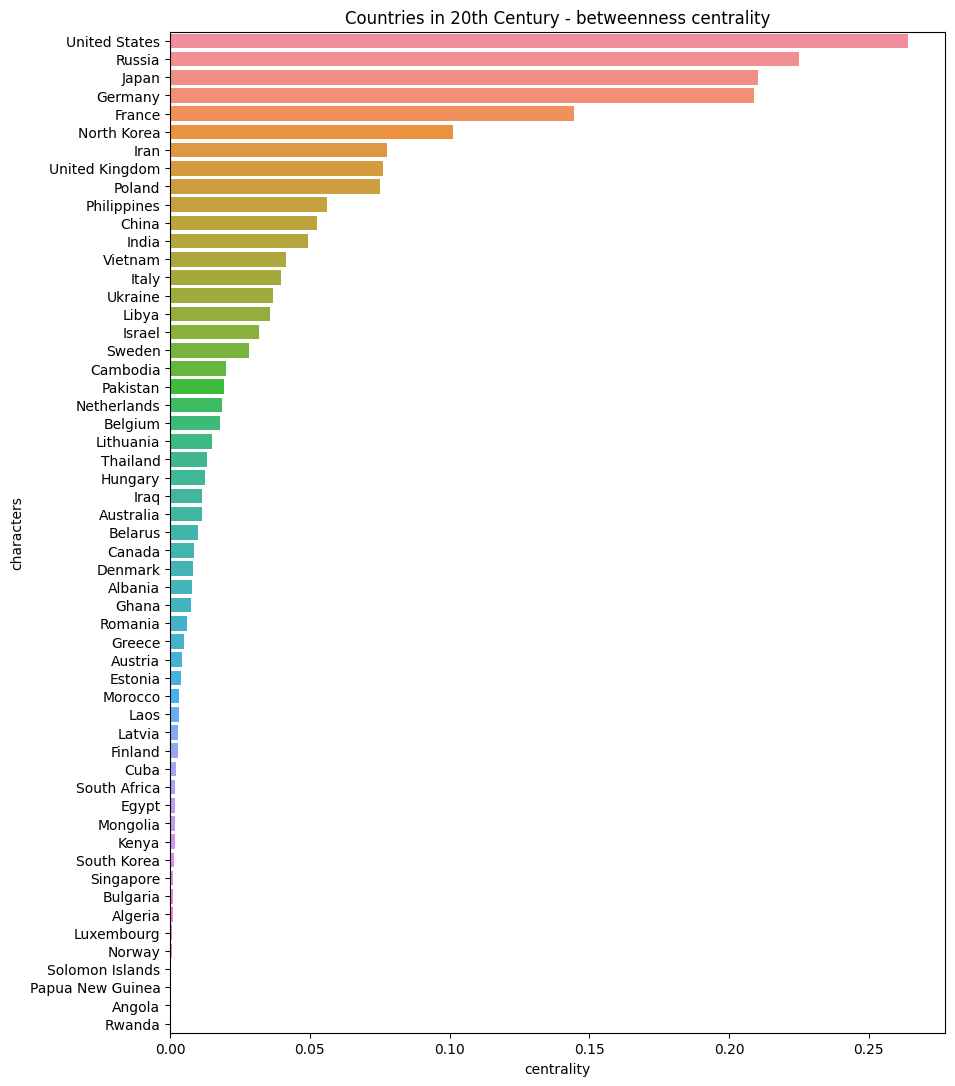

In [34]:
plt.figure(figsize = (10, 13))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = betweennes_df).set_title("Countries in 20th Century - betweenness centrality")

In [44]:
# Betweenness Centrality

# The highest betweenness centrality scores are held by United States, Russia, Japan, and Germany.
# These countries acted as bridges or key intermediaries between different parts of the global network — often linking separate regional clusters.
# Historically, this reflects their geopolitical influence and involvement in major alliances and conflicts that shaped global connections throughout the 20th century

In [35]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [36]:
G.nodes['Germany']

{'size': 13,
 'group': 0,
 'degree_centrality': 0.24074074074074073,
 'betweenness_centrality': 0.2088056170865396,
 'closeness_centrality': 0.5}